In [1]:
import sys
sys.path.append('/home/svdcvt/miniconda3/lib/python3.8/site-packages')
import tinkhorn
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

K_full = lambda bins, beta: np.exp(- cdist(bins, bins) / beta)
C = lambda K, beta: - np.log(K) * beta
gamma = lambda a, b, K: a.reshape(-1, 1) * K * b
mapping = lambda a, b, K, beta: np.argmin(gamma(a, b, K).dot(C(K, beta)), 1)

In [2]:
def plot_map():
    plt.figure(figsize = (15, 15))
    plt.title(f'Map from source shape to image ({method})',
                 fontsize=18)
    plt.xlabel('$x_1$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlim(xmin-0.05, xmax+0.05)
    plt.ylabel('$x_2$', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(ymin-0.05, ymax+0.05)
    # plt.scatter(xbins[:,0], xbins[:,1], s=5, label='source')
    # plt.scatter(ybins[:,0], ybins[:,1], s=5, label='tagret')
    # plt.scatter(hat_xbins[:,0], hat_xbins[:,1], marker='x', s=5, label='source corresponding image')
    for j in range(len(xbins)):
        plt.arrow(xbins[j, 0], xbins[j, 1], hat_xbins[j, 0] - xbins[j, 0], hat_xbins[j, 1] - xbins[j, 1], 
                  head_width=0.01, alpha=0.3, length_includes_head=True)
    # plt.legend(loc='upper right', bbox_to_anchor=(1., 1.01))
    plt.savefig(f'map_{method}_{binsize}_{beta}_' + fname)
    plt.show()

In [3]:
def plot_image():
    plt.figure(figsize = (15, 15))
    plt.title(f'Image of source shape and target ({method})',
                 fontsize=18)
    plt.xlabel('$x_1$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlim(xmin-0.05, xmax+0.05)
    plt.ylabel('$x_2$', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(ymin-0.05, ymax+0.05)
    plt.scatter(ybins[:,0], ybins[:,1], s=20, label='tagret', c='orange')
    plt.scatter(hat_xbins[:,0], hat_xbins[:,1], marker='x', s=20, c='g', label='source corresponding image')
    # for j in range(len(xbins)):
    #     plt.arrow(xbins[j, 0], xbins[j, 1], hat_xbins[j, 0] - xbins[j, 0], hat_xbins[j, 1] - xbins[j, 1], 
    #               head_width=0.01, alpha=0.3, length_includes_head=True)
    plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1., 1.01))
    plt.savefig(f'image_{method}_{binsize}_{beta}_'+fname)
    plt.show()

In [61]:
def plot_mesh(points, distribution, fname, every=1, dots=0):
    mask = distribution.reshape(binsize, binsize)
    maskT = mask.T
    horizontals = points.reshape(binsize, binsize, 2)
    verticals = np.transpose(horizontals, (1, 0, 2))
    plt.figure(figsize=(15, 15))
    plt.title(f'Image mesh of flower ($C_1$={A}, $C_2$={B}), binsize=${binsize}^2$, mesh=${binsize//every}^2$, beta={beta}, {method}',
             fontsize=14)
    plt.xlabel('$x_1$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.xlim(xmin-0.05, xmax+0.05)
    plt.ylabel('$x_2$', fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(ymin-0.05, ymax+0.05)
    for i in range(0, binsize, every):
        m1, m2 = mask[i] > 0, maskT[i] > 0
        plt.plot(horizontals[i][m1][::every,0], horizontals[i][m1][::every,1], 
                 f'o-', c='k', linewidth=0.2, markersize=dots)
        plt.plot(verticals[i][m2][::every,0], verticals[i][m2][::every,1], 
                 f'o-', c='k', linewidth=0.2, markersize=dots)
    plt.savefig(f'mesh_{method}_{binsize}_{beta}_' + fname)
    plt.show()

In [41]:
N = 100000
square = (np.random.rand(N, 2) * 2 - 1)*10
rho = np.sqrt(np.random.rand(N))
phi = np.random.uniform(0, 2 * np.pi, N)
shape = np.vstack([rho * np.cos(phi), rho * np.sin(phi)]).T
A, B = 0.7, 0.3
r = A + B * np.cos(3 * phi)
shape = 10*np.vstack([(A + B*np.cos(3*phi))*np.cos(phi), (A + B*np.cos(3*phi))*np.sin(phi)]).T

In [42]:
allpoints = np.vstack([shape, np.array([[1,  1],
                                       [ 1, -1],
                                       [-1,  1],
                                       [-1, -1]])*10])

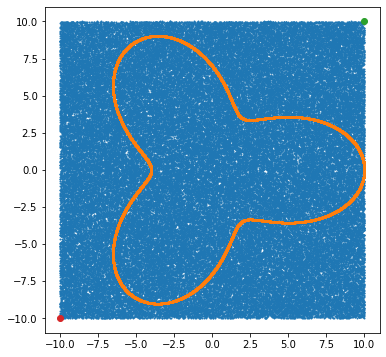

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(square[:,0], square[:,1], s=1)
plt.scatter(shape[:,0], shape[:,1], s=1)
plt.scatter(*allpoints.max(0))
plt.scatter(*allpoints.min(0))
plt.show()

In [44]:
xmin, ymin, xmax, ymax = *allpoints.min(0), *allpoints.max(0)
borders = np.array([[xmin, ymin],
                    [xmin, ymax],
                    [xmax, ymin],
                    [xmax, ymax]])

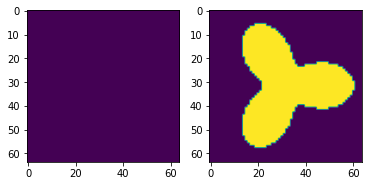

In [45]:
plt.subplot(121)
plt.imshow(p)
plt.subplot(122)
plt.imshow(q)
plt.show()

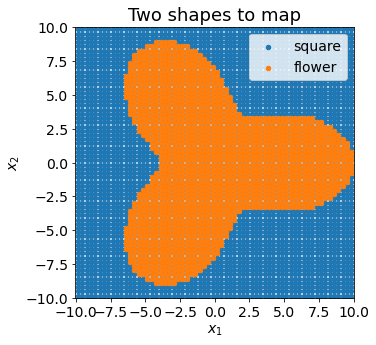

In [48]:
plt.figure(figsize=(5,5))
plt.title('Two shapes to map',
             fontsize=18)
plt.xlabel('$x_1$', fontsize=14)
plt.xticks(fontsize=14)
plt.xlim(xmin-0.05, xmax+0.05)
plt.ylabel('$x_2$', fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(ymin-0.05, ymax+0.05)
plt.scatter(bins[c1, 0], bins[c1, 1], s=20, label='square')
plt.scatter(bins[c2, 0], bins[c2, 1], s=20, label=shape)
plt.legend(fontsize=14, loc='upper right')
# plt.savefig(f'two_shapes_square_to_{shape}.png')
plt.show()

In [86]:
# without clouds 2D
binsize = 360
shape = 'circle'
# shape = 'flower'
fname = f'square_to_{shape}.png'

bins, p, q = tinkhorn.binning(borders, borders, binsize)
x, y = bins[:, 0], bins[:, 1]

# square
p = np.zeros_like(p).ravel()
c1 = (np.abs(x) <= 10) * (np.abs(y) <= 10)
m = c1.sum()
p[c1] = 1 / m
p = p.reshape(binsize, binsize)

# shape
if shape == 'circle':
    c2 = (x ** 2 + y ** 2 < 90)
elif shape == 'flower':
    phi = np.arctan2(y, x)
    c2 = (A + B * np.cos(3 * np.arctan2(y,x)))*10 > np.sqrt(x ** 2 + y ** 2) 
    
m = c2.sum()
q = np.zeros_like(q).ravel()
q[c2] = 1 / m 
q = q.reshape(binsize, binsize)

X, Y = bins[p.ravel() > 0], bins[q.ravel() > 0]

Starting iterative process
#iterations=5,  err=0.00013974551742374188, 265.868ms per iteration
Finished


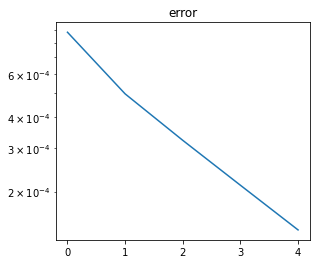

In [85]:
beta = 0.9
num_iter = 100
method = 'sinkhorn_toeplitz'
K, a, b, _, _, _ = tinkhorn.sinkhorn_toeplitz(p, q, bin_size=bins, beta=beta, 
                                              max_iter=5, plot=1,
                                              store_full=False, store_err=True, early_stopping=True,
                                             )

In [87]:
method = 'sinkhorn'
# beta=0.05
K, a, b = tinkhorn.sinkhorn(X, Y, beta=beta, max_iter=2, 
                            early_stopping=False, 
#                             store_err=False, 
                            plot_mat=False, verbose=True, plot_err=1)

MemoryError: Unable to allocate 88.5 GiB for an array with shape (129600, 91628) and data type float64

In [64]:
if method == 'sinkhorn_toeplitz':
    C_ = cdist(bins, bins[q.ravel()>0])

    K_full = np.exp(-C_/beta)
    g = a.reshape(-1, 1) * K_full * b[q.ravel()>0]
    tmp = (g)[p.ravel()>0].dot(C_[q.ravel()>0])
    transport = np.argmin(tmp, 1)
    
#     K = K_full(bins, beta)
#     transport = mapping(a, b, K, beta)

    xbins, ybins = bins[p.ravel() > 0], bins[q.ravel() > 0]
    hat_xbins = ybins[transport]#[p.ravel() > 0]
elif method == 'sinkhorn':
    g = (a.reshape(-1, 1) * K * b)
    C_ = cdist(Y, Y)
    transport = np.argmin(g.dot(C_), -1)

    xbins, ybins = X, Y 
    hat_xbins = Y[transport]

KeyboardInterrupt: 

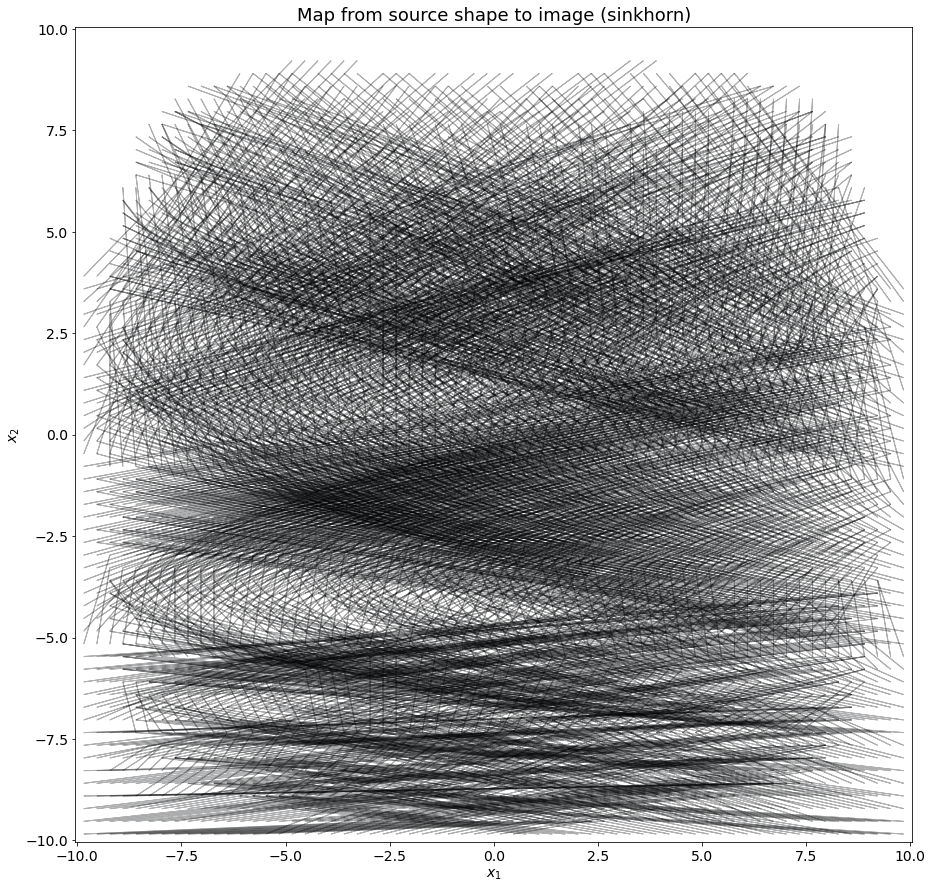

In [74]:
plot_map()

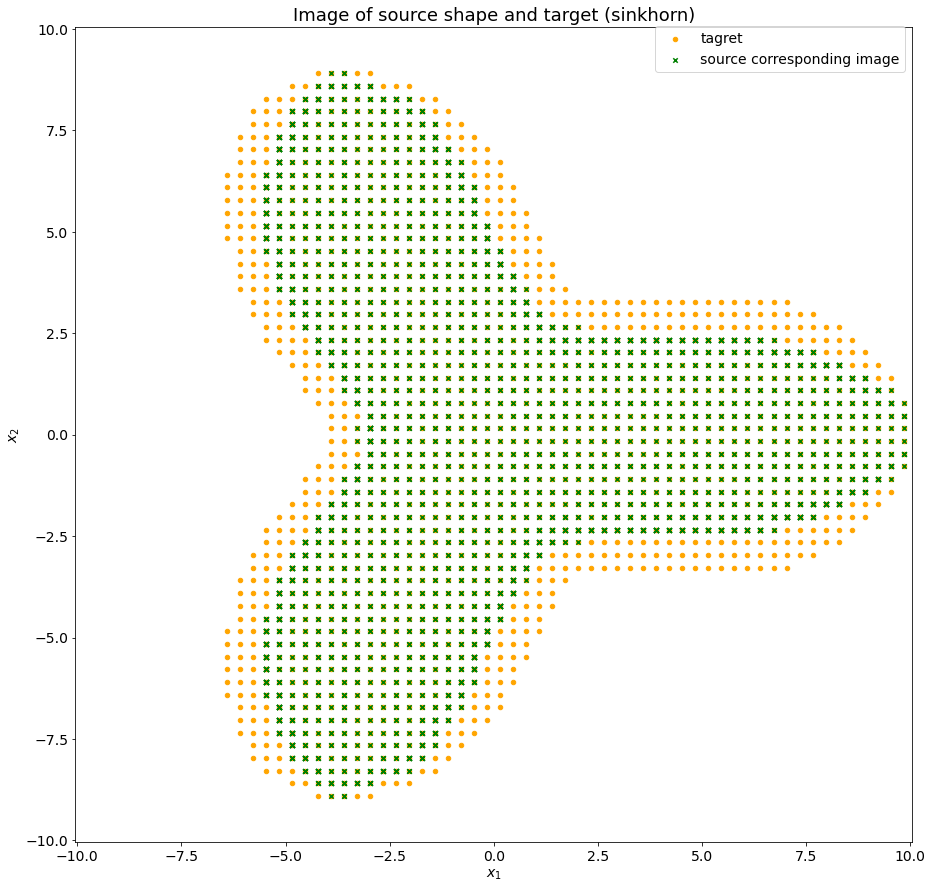

In [65]:
plot_image()

In [66]:
hat_xbins_2 = bins[:, :]
hat_xbins_2[p.ravel()>0] = hat_xbins

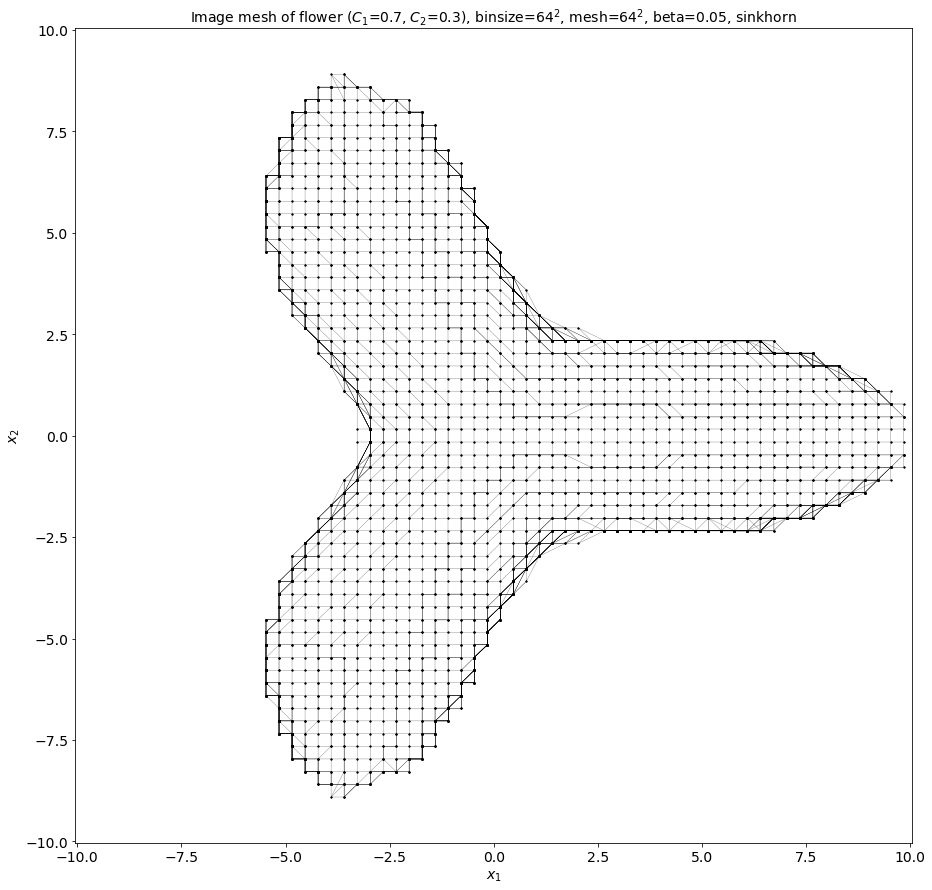

In [67]:
plot_mesh(points=hat_xbins_2, distribution=p, fname=fname, every=1, dots=1)

In [105]:
import sys
from PIL import Image

import os
from pathlib import Path

from datetime import datetime

dt_string = datetime.now().strftime("%d_%m_%Y_%H_%M")

files = [x for x in Path().iterdir() if f'{method}_{binsize}_{beta}_{fname}' in x.name]
files.sort(key=os.path.getctime)

images = [Image.open(x.name) for x in files]
widths, heights = zip(*(i.size for i in images))

total_width = sum(widths)
max_height = max(heights)

new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

new_im.save(f'report_{method}_{binsize}_{beta}_{dt_string}.jpg')

## 3D (cube and sphere surface)

In [278]:
N = 60000
cube = []
for i in range(3):
    for x in [-1, +1]:
        f = np.random.rand(N // 6, 2) * 2 - 1
        cube.append(np.insert(f, i, x, axis=1))
cube = np.vstack(cube)
        
theta = np.random.uniform(0, 2 * np.pi, N)
phi = np.random.uniform(0, np.pi, N)
r = 1
x = r * np.cos(theta) * np.sin(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(phi)
sphere = np.vstack([x, y, z]).T

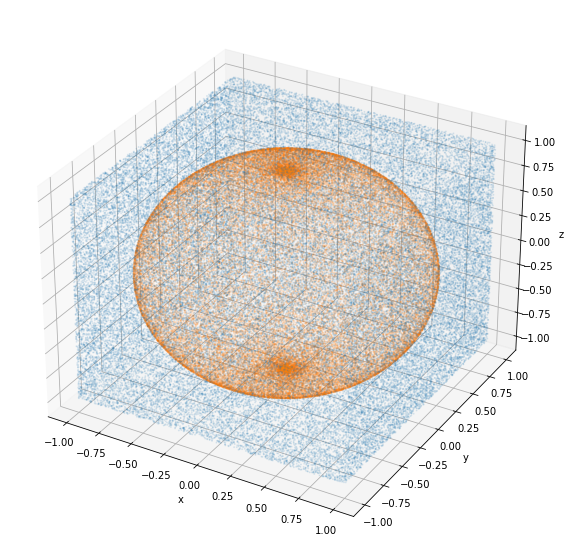

In [279]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(cube[:, 0], cube[:, 1], cube[:, 2], s=1, alpha=0.1, label='cube surface')
ax.scatter(sphere[:, 0], sphere[:, 1], sphere[:, 2], s=1, alpha=0.1, label='sphere surface')
plt.show()

In [11]:
# without clouds 3D
binsize = 32
beta = 0.02
borders = np.array(np.meshgrid([-1, 1], [-1, 1], [-1, 1])).reshape(-1, 3)
bins, p, q = tinkhorn.binning(borders, borders, binsize)
summ_bins = bins[:,0]**2 + bins[:, 1]**2 + bins[:,2]**2
tol = 1e-1
is_sphere = np.isclose(summ_bins, 1, tol)
is_cube = np.any(np.isin(abs(bins), bins.max()), -1)
p = np.zeros_like(p).ravel()
p[is_cube] = 1 / is_cube.sum()
p = p.reshape(binsize, binsize, binsize)
q = np.zeros_like(q).ravel()
q[is_sphere] = 1 / is_sphere.sum()
q = q.reshape(binsize, binsize, binsize)

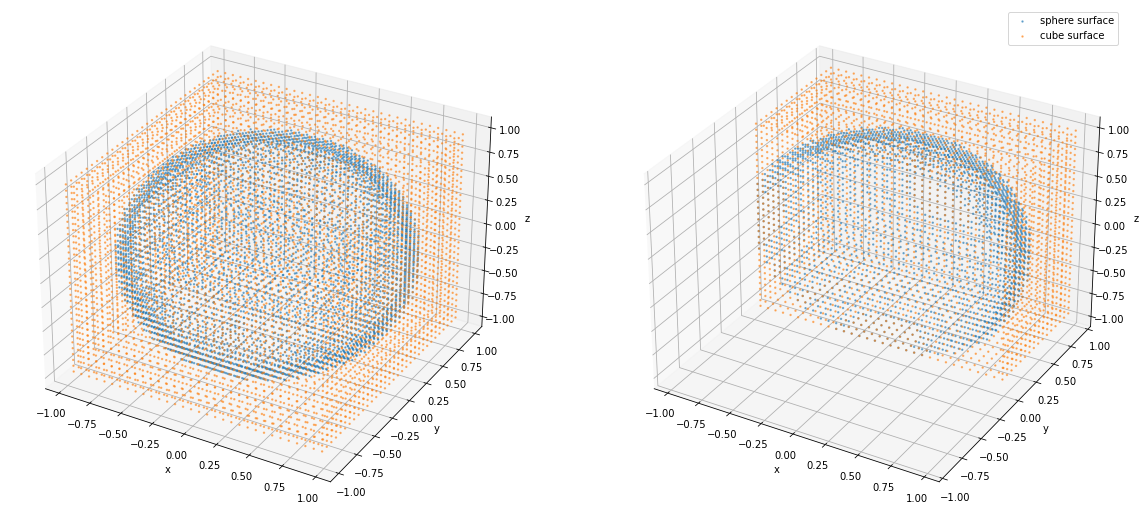

In [302]:
mask = bins[:, 1] > 0
fig = plt.figure(figsize=(20,10), )
ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(bins[is_sphere,0], bins[is_sphere,1], bins[is_sphere,2], s=2, alpha=0.5, label='sphere surface')
ax.scatter(bins[is_cube,0], bins[is_cube,1], bins[is_cube,2], s=2, alpha=0.5, label='cube surface')
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.scatter(bins[is_sphere*mask,0], bins[is_sphere*mask,1], bins[is_sphere*mask,2], s=2, alpha=0.5, label='sphere surface')
ax2.scatter(bins[is_cube*mask,0], bins[is_cube*mask,1], bins[is_cube*mask,2], s=2, alpha=0.5, label='cube surface')
ax2.set_ylim(-1, 1)
plt.legend()
plt.show()

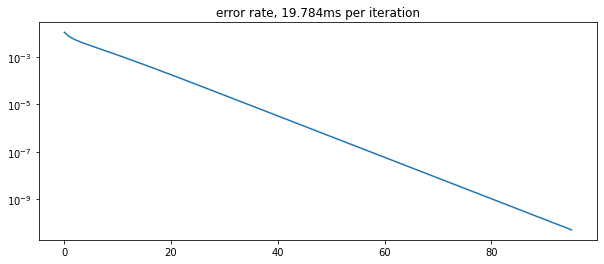

#iterations=96, early stopping: tol, err=5.0386903034156765e-11, 19.784ms per iteration
Finished


In [303]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(p, q, bin_size=bins, beta=beta * 2, 
                                                 max_iter=100, store_full=False, plot=1)

In [ ]:
K = K_full(bins, beta)
transport = mapping(a, b, K, beta)

In [ ]:
xbins, ybins = bins[p.ravel() > 0], bins[q.ravel() > 0]
hat_xbins = bins[transport][p.ravel() > 0]

In [ ]:
fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(projection='3d')
x, y, z = xbins[:, 0], xbins[:, 1], xbins[:, 2]
u, v, w = hat_xbins[:, 0] - xbins[:, 0], hat_xbins[:, 1] - xbins[:, 1], hat_xbins[:, 2] - xbins[:, 2]
ax.scatter(ybins[:,0], ybins[:,1], ybins[:,2], 
           s=10, alpha=0.5, c='r', label='target')
ax.scatter(hat_xbins[:,0], hat_xbins[:,1], hat_xbins[:,2], 
           s=10, alpha=0.5, c='b', label='source corresponding image')
ax.quiver(x, y, z, u, v, w, alpha=0.1, color='k')
ax.legend(bbox_to_anchor=(1., 1.01))
# plt.savefig('cube_to_sphere.png')
plt.show()

In [ ]:
# plot_wireframe

## Clouds experiments with number of bins

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=2**10, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=512, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=256, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=64, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=32, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=16, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=8, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=4, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

In [ ]:
K, a, b, bins, p, q = tinkhorn.sinkhorn_toeplitz(X, Y, bin_size=2, beta=beta, 
                                                 max_iter=10, store_full=False, plot=2)

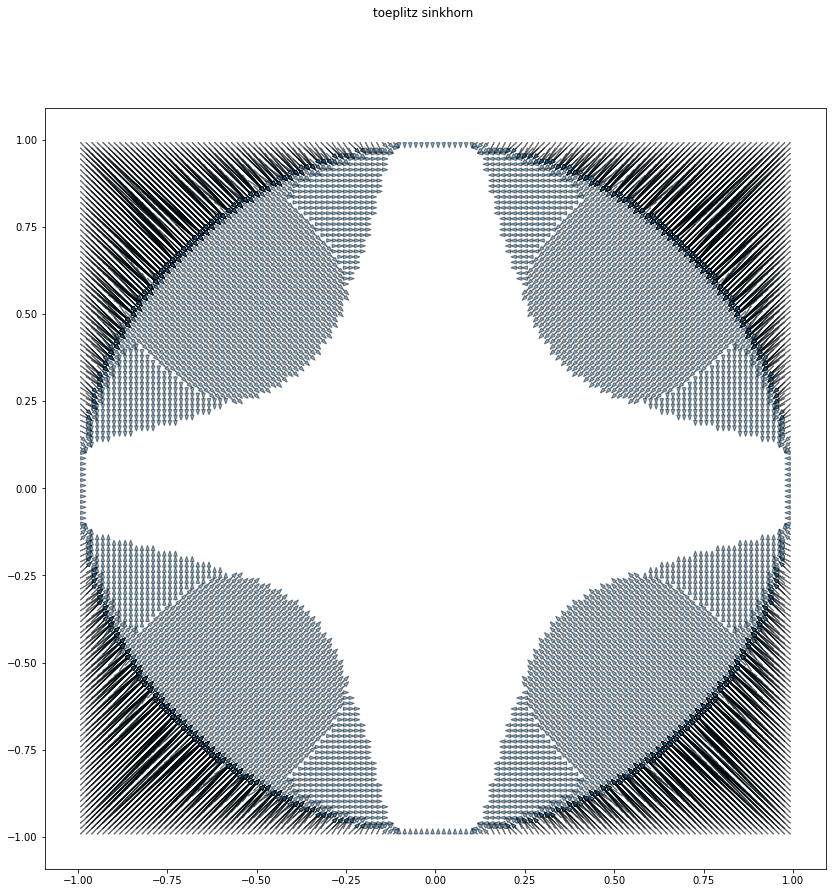

In [ ]:
# from utils import Arrow3D

# fig = plt.figure(figsize = (10,10))
# fig.suptitle('toeplitz sinkhorn')
# ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# # ax.scatter(xbins[:,0], xbins[:,1], xbins[:,2], s=p[p>0]*1000, label='source')
# ax.scatter(ybins[:,0], ybins[:,1], ybins[:,2], s=y[y>0]*1000, label='target')
# ax.scatter(hat_xbins[:,0], hat_xbins[:,1], hat_xbins[:,2], s=x[x>0]*1000, marker='o', label='source corresponding image')
# # for j in range(len(xbins)):
# #     arrow = Arrow3D([xbins[j, 0],  hat_xbins[j, 0]], [xbins[j, 1],  hat_xbins[j, 1]], 
# #             [xbins[j, 2],  hat_xbins[j, 2]], mutation_scale=10, 
# #             lw=0.5, arrowstyle="-|>", color="k", alpha=0.5)
# #     ax.add_artist(arrow)
# ax.legend(bbox_to_anchor=(1., 1.01))
# # plt.savefig('cube_to_sphere.png')
# plt.show()